# Lesson 09 Assignment
Author:Ajai Shukla
Instructions

It is recommended you complete the lab exercises for this lesson before beginning the assignment.

Using the CIFAR-10 dataset (Links to an external site.), create a new notebook to build a TensorlLow model. Perform each of the following tasks and answer the related questions:

    Read CIFAR-10 dataset from Keras. (Links to an external site.)
    Explore data
    Preprocess and prepare data for classification
    Build a TensorFlow model using a single dense hidden layer
    Apply model to test set and evaluate accuracy
    Perform 3 adjusts to the number of layers and activation functions to improve accuracy
    Summarize your findings regarding the different iterations and any insights gained


In [93]:
!pip install tensorflow==2.0.0-alpha0

In [174]:
from __future__ import absolute_import, division, print_function, unicode_literals

# Install TensorFlow
# !pip install tensorflow==2.0.0-alpha0

import tensorflow as tf

In [231]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

#import numpy and matplotlib
import numpy as np
import matplotlib.pyplot as plt

In [269]:
# Import all modules
import time
import keras
import keras.utils
from keras import utils as np_utils
import matplotlib.pyplot as plt
import numpy as np
from keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.layers import Activation
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
from keras_sequential_ascii import sequential_model_to_ascii_printout
from tensorflow.keras import backend as K
from matplotlib import pyplot

# Import Tensorflow with multiprocessing
import tensorflow as tf
import multiprocessing as mp
 
# Loading the CIFAR-10 datasets
from keras.datasets import cifar10

 As a good practice suggests, we need to declare our variables:

    batch_size – the number of training examples in one forward/ backwards pass. The higher the batch size, the more memory space you’ll need
    num_classes – number of cifar-10 dataset classes
    one epoch – one forward pass and one backward pass of all the training examples

In [275]:
# Declare variables
 
batch_size = 32 
# 32 examples in a mini-batch, smaller batch size means more updates in one epoch
 
num_classes = 10 #
epochs = 10 # repeat 100 times

Next, we can load the CIFAR-10 data set.

In [276]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data() 
# x_train - training data(images), y_train - labels(digits)

Print figure with 10 random images from the CIFAR-10 dataset.

Train: X=(50000, 32, 32, 3), y=(50000, 1)
Test: X=(10000, 32, 32, 3), y=(10000, 1)


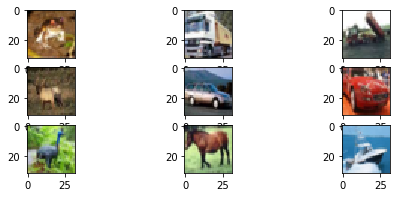

In [277]:
# Print figure with 10 random images from each
 
fig = plt.figure(figsize=(8,3))
print('Train: X=%s, y=%s' % (x_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (x_test.shape, y_test.shape))
# plot first few images
for i in range(9):
# define subplot
    pyplot.subplot(330 + 1 + i)
	# plot raw pixel data
    pyplot.imshow(x_train[i])
# show the figure
pyplot.show()


The pixel values are in the range of 0 to 255 for each of the red, green and blue channels.

It’s good practice to work with normalized data.

Because the input values are well understood, we can easily normalize to the range 0 to 1 by dividing each value by the maximum observation which is 255.

Note, the data is loaded as integers, so we must cast it to float point values in order to perform the division.

In [278]:
# Convert and pre-processing
 
y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train  /= 255
x_test /= 255

In [279]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

The output variables are defined as a vector of integers from 0 to 1 for each class.

Let’s start by defining a simple CNN model.

We will use a model with four convolutional layers followed by max pooling and a flattening out of the network to fully connected layers to make predictions:

    Convolutional input layer, 32 feature maps with a size of 3×3, a rectifier activation function
    Convolutional input layer, 32 feature maps with a size of 3×3, a rectifier activation function
    Max Pool layer with size 2×2
    Dropout set to 25%
    Convolutional input layer, 64 feature maps with a size of 3×3, a rectifier activation function
    Convolutional input layer, 64 feature maps with a size of 3×3, a rectifier activation function
    Max Pool layer with size 2×2
    Dropout set to 25%
    Flatten layer
    Fully connected layer with 512 units and a rectifier activation function
    Dropout set to 50%
    Fully connected output layer with 10 units and a softmax activation function

 

A logarithmic loss function is used with the stochastic gradient descent (SGD) optimization algorithm configured with a large momentum and weight decay start with a learning rate of 0.1.

Then we can fit this model with 100 epochs and a batch size of 32.

In [280]:
from tensorflow import keras

# model = keras.model.Sequential()
keras.__version__

'2.2.4-tf'

In [281]:
from tensorflow import keras


In [290]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, (3, 3), input_shape=(32, 32, 3), activation='relu'))
model.add(keras.layers.Dropout(0.25))
model.add(keras.layers.Conv2D(32, (3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(1, 1)))
model.add(keras.layers.Dropout(0.25))

#model.add(keras.layers.Conv2D(64, (3, 3), padding='same'))
#model.add(keras.layers.Activation('relu'))
#model.add(keras.layers.Conv2D(64, (3,3)))
#model.add(keras.layers.Activation('relu'))
#model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
#model.add(keras.layers.Dropout(0.25))
#
#model.add(keras.layers.Flatten())
#model.add(keras.layers.Dense(512))
#model.add(keras.layers.Activation('relu'))
#model.add(keras.layers.Dropout(0.5))
#model.add(keras.layers.Dense(num_classes))
#model.add(keras.layers.Activation('softmax'))
#sgd = tf.keras.optimizers.SGD(lr = 0.1, decay=1e-6, momentum=0.9, nesterov=False)


In [291]:
# # Train model

model.compile(loss='sparse_categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

In [292]:
# fit model
#cnn_n = model.fit(x_train, y_train, epochs=100, batch_size=64, validation_data=(x_test, y_test), verbose=0)
#model.fit(x_train, y_train, nb_epoch=epochs, batch_size=batch_size, validation_data=(x_test, y_test))
cnn_n = model.fit(x_train, y_train, epochs=epochs, validation_data=(x_test, y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10


InvalidArgumentError: Can not squeeze dim[1], expected a dimension of 1, got 10
	 [[{{node metrics_21/accuracy/Squeeze}}]] [Op:__inference_keras_scratch_graph_18198]

In [ ]:
import tensorflow
tensorflow.__version__

In [198]:
model.fit(x_train, y_train, batch_size=256, epochs=25, shuffle=True, callbacks=[reduce_lr])

NameError: name 'x_val' is not defined

In [170]:
history =  model.fit(x_train, y_train, batch_size=50, epochs=200, validation_split=0.3).history

Train on 35000 samples, validate on 15000 samples
Epoch 1/200


InvalidArgumentError: Can not squeeze dim[1], expected a dimension of 1, got 10
	 [[{{node metrics_4/accuracy/Squeeze}}]] [Op:__inference_keras_scratch_graph_3261]

The second variant for 6-layer model:

    Convolutional input layer, 32 feature maps with a size of 3×3, a rectifier activation function
    Dropout set to 20%
    Convolutional input layer, 32 feature maps with a size of 3×3, a rectifier activation function
    Max Pool layer with size 2×2
    Convolutional input layer, 64 feature maps with a size of 3×3, a rectifier activation function
    Dropout set to 20%
    Convolutional input layer, 64 feature maps with a size of 3×3, a rectifier activation function
    Max Pool layer with size 2×2
    Convolutional input layer, 128 feature maps with a size of 3×3, a rectifier activation function
    Dropout set to 20%
    Convolutional input layer, 128 feature maps with a size of 3×3, a rectifier activation function
    Max Pool layer with size 2×2
    Flatten layer
    Dropout set to 20%
    Fully connected layer with 1024 units and a rectifier activation function and a weight constraint of max norm set to 3
    Dropout set to 20%
    Fully connected output layer with 10 units and a softmax activation function

In [171]:
def base_model():
    model = Sequential()

    model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=x_train.shape[1:]))
    model.add(Dropout(0.2))

    model.add(Conv2D(32,(3,3),padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Conv2D(64,(3,3),padding='same',activation='relu'))
    model.add(Dropout(0.2))

    model.add(Conv2D(64,(3,3),padding='same',activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Conv2D(128,(3,3),padding='same',activation='relu'))
    model.add(Dropout(0.2))

    model.add(Conv2D(128,(3,3),padding='same',activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Flatten())
    model.add(Dropout(0.2))
    model.add(Dense(1024,activation='relu',kernel_constraint=maxnorm(3)))
    model.add(Dropout(0.2))
    model.add(Dense(num_classes, activation='softmax'))

In this section, we can visualize the model structure. For this problem, we can use a library for Keras for investigating architectures and parameters of sequential models by Piotr Migdał.

In [172]:
# Vizualizing model structure

sequential_model_to_ascii_printout(cnn_n)

           OPERATION           DATA DIMENSIONS   WEIGHTS(N)   WEIGHTS(%)

               Input   #####     32   32    3
              Conv2D    \|/  -------------------       896     0.1%
                relu   #####     32   32   32
              Conv2D    \|/  -------------------      9248     0.7%
                relu   #####     30   30   32
        MaxPooling2D   Y max -------------------         0     0.0%
                       #####     15   15   32
             Dropout    | || -------------------         0     0.0%
                       #####     15   15   32
              Conv2D    \|/  -------------------     18496     1.5%
                relu   #####     15   15   64
              Conv2D    \|/  -------------------     36928     3.0%
                relu   #####     13   13   64
        MaxPooling2D   Y max -------------------         0     0.0%
                       #####      6    6   64
             Dropout    | || -------------------         0     0.0%
              

In [173]:
# Plots for training and testing process: loss and accuracy

plt.figure(0)
plt.plot(cnn_n.history['acc'],'r')
plt.plot(cnn_n.history['val_acc'],'g')
plt.xticks(np.arange(0, 101, 2.0))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Accuracy")
plt.title("Training Accuracy vs Validation Accuracy")
plt.legend(['train','validation'])


plt.figure(1)
plt.plot(cnn.history['loss'],'r')
plt.plot(cnn.history['val_loss'],'g')
plt.xticks(np.arange(0, 101, 2.0))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Loss")
plt.title("Training Loss vs Validation Loss")
plt.legend(['train','validation'])


plt.show()

TypeError: 'History' object is not subscriptable

<Figure size 432x288 with 0 Axes>